**Nama   : Ferry Firman Nur WAhyu** <br>


## Data Understanding

In [3]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load Data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/DataSource/Chapter10DataSet_Training.csv'

In [ ]:
load_tabletAdoption = pd.read_csv(path)

In [ ]:
df = pd.DataFrame(load_tabletAdoption)
df.head()

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,Tablet_Adoption
0,9552,M,61,M,Seldom,Yes,Yes,Yes,No,Bank Transfer,Late Majority
1,6757,M,27,M,Regular,Yes,No,Yes,No,Bank Transfer,Innovator
2,3599,F,29,M,Seldom,Yes,Yes,Yes,Yes,Bank Transfer,Early Adopter
3,6811,M,49,M,Seldom,Yes,Yes,Yes,Yes,Website Account,Early Adopter
4,4104,M,29,S,Seldom,Yes,Yes,Yes,No,Website Account,Late Majority


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   User_ID                    661 non-null    int64 
 1   Gender                     661 non-null    object
 2   Age                        661 non-null    int64 
 3   Marital_Status             661 non-null    object
 4   Website_Activity           661 non-null    object
 5   Browsed_Electronics_12Mo   661 non-null    object
 6   Bought_Electronics_12Mo    661 non-null    object
 7   Bought_Digital_Media_18Mo  661 non-null    object
 8   Bought_Digital_Books       661 non-null    object
 9   Payment_Method             661 non-null    object
 10  Tablet_Adoption            661 non-null    object
dtypes: int64(2), object(9)
memory usage: 56.9+ KB


Data tersebut banyak yang bertipe String sehingga pada pengolahan data akan diperlukan Label Encoder

In [ ]:
# Target Variabel
df['Tablet_Adoption'].value_counts()

Early Adopter     205
Early Majority    186
Late Majority     172
Innovator          98
Name: Tablet_Adoption, dtype: int64

In [ ]:
df.isnull().sum()

User_ID                      0
Gender                       0
Age                          0
Marital_Status               0
Website_Activity             0
Browsed_Electronics_12Mo     0
Bought_Electronics_12Mo      0
Bought_Digital_Media_18Mo    0
Bought_Digital_Books         0
Payment_Method               0
Tablet_Adoption              0
dtype: int64

In [ ]:
df.isna().sum()

User_ID                      0
Gender                       0
Age                          0
Marital_Status               0
Website_Activity             0
Browsed_Electronics_12Mo     0
Bought_Electronics_12Mo      0
Bought_Digital_Media_18Mo    0
Bought_Digital_Books         0
Payment_Method               0
Tablet_Adoption              0
dtype: int64

## Data Preparation

In [ ]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

# Membuat instance dari LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df_input = pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index = df.index)
df_input.head()

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,Tablet_Adoption
0,599,1,45,0,2,1,1,1,0,0,3
1,388,1,11,0,1,1,0,1,0,0,2
2,178,0,13,0,2,1,1,1,1,0,0
3,393,1,33,0,2,1,1,1,1,3,0
4,207,1,13,1,2,1,1,1,0,3,3


In [ ]:
# Kita harus tau hasil encoder dari field targer
df_input['Tablet_Adoption'].value_counts()

0    205
1    186
3    172
2     98
Name: Tablet_Adoption, dtype: int64

0 -> Early Adopter <br>
1 -> Early Majority <br>
2 -> Innovator <br>
3 -> Late Majority

## Pemodelan Data

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
# Input Variabel
x = df_input[['Gender',	'Age',	'Marital_Status',	'Website_Activity',	'Browsed_Electronics_12Mo',	'Bought_Electronics_12Mo',	'Bought_Digital_Media_18Mo',	'Bought_Digital_Books',	'Payment_Method']]

# Target Variabel
y = df_input['Tablet_Adoption'].astype('category')

In [ ]:
# Spliting Training & Testing, 70% training dan 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## Decision Tree

In [ ]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Evaluation Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Membuat Object Algoritma Decision Tree Klasifikasi
tree = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 6)

# Memodelkan data menggunakan algoritma decision tree
model_tree = tree.fit(x_train, y_train)

# Melakukan predict pada data test
pred_tree = model_tree.predict(x_test)

### Evaluasi Decision Tree

In [ ]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.51      0.64      0.56        66
           1       0.69      0.35      0.47        57
           2       0.44      0.48      0.46        29
           3       0.69      0.81      0.75        47

    accuracy                           0.57       199
   macro avg       0.58      0.57      0.56       199
weighted avg       0.59      0.57      0.56       199



Text(113.9222222222222, 0.5, 'predicted label')

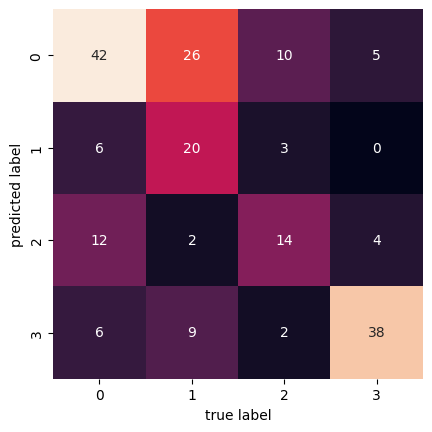

In [ ]:
# Visualize the confusion matrix of Decision Tree
mat = confusion_matrix (y_test, pred_tree)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<Axes: >

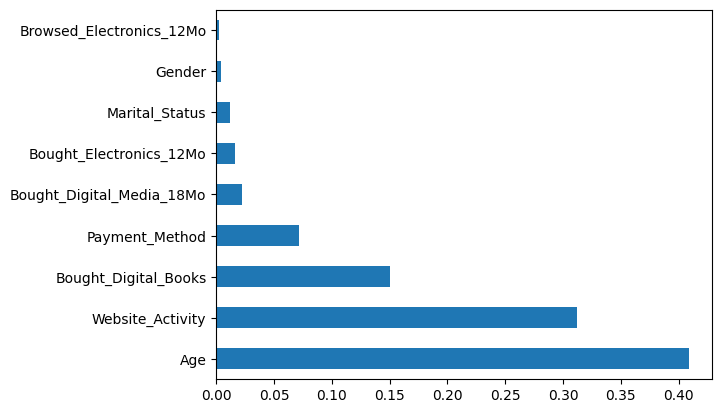

In [ ]:
# Signifikan faktor dari model Decision Tree yang menggambarkan nasabah gagal bayar/tidak

feat_importances = pd.Series(model_tree.feature_importances_, index = x.columns)
feat_importances.nlargest(10).plot(kind = 'barh')

### K-Fold Validation

K-Fold Cross Validation adalah salah satu dari jenis pengujian cross validation yang berfungsi untuk menilai kinerja proses sebuah metode algoritme dengan membagi sampel data secara acak dan mengelompokkan data tersebut sebanyak nilai K-Fold.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model_tree, x, y, cv = 10, scoring = 'f1_macro')
scores

array([0.63576641, 0.68782051, 0.53085568, 0.60467775, 0.67736729,
       0.5323214 , 0.68611857, 0.60203036, 0.31814127, 0.23830011])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.55 accuracy with a standard deviation of 0.15


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Membuat Object Algoritma Random Forest
clf_rf = RandomForestClassifier(n_estimators=200, max_depth=6)

# Memodelkan data menggunakan algoritma random forest
model_rf = clf_rf.fit(x_train, y_train)

# Melakukan predict pada data test
pred_rf = model_rf.predict(x_test)

### Evaluasi Random Forest

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.59      0.67      0.63        66
           1       0.75      0.42      0.54        57
           2       0.46      0.66      0.54        29
           3       0.71      0.79      0.75        47

    accuracy                           0.62       199
   macro avg       0.63      0.63      0.61       199
weighted avg       0.65      0.62      0.62       199



Text(113.9222222222222, 0.5, 'predicted label')

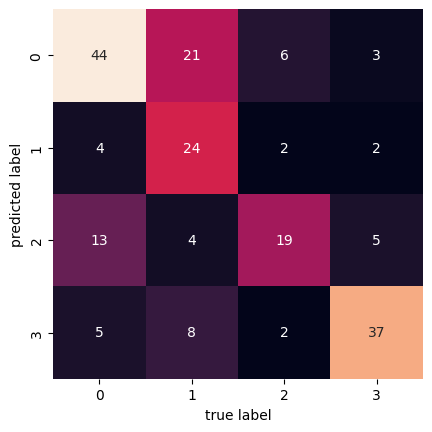

In [ ]:
# Visualize the confusion matrix of Random Forest
mat = confusion_matrix(y_test, pred_rf)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### K-Fold Validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model_tree, x, y, cv = 10, scoring = 'f1_macro')
scores

array([0.63576641, 0.68782051, 0.54105976, 0.60467775, 0.68163558,
       0.5323214 , 0.68611857, 0.60203036, 0.31814127, 0.23830011])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.55 accuracy with a standard deviation of 0.15


## XG Boost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Membuat Object Algoritma XGBOOST Classifier
clf_xg = XGBClassifier()

# Memodelkan data menggunakan algoritma XGBOOST Classifier
model_xg = clf_xg.fit(x_train, y_train)

# Melakukan predict pada data test
pred_xg = model_xg.predict(x_test)

### Evaluasi XG Boost

In [ ]:
print(classification_report(y_test, pred_xg))

              precision    recall  f1-score   support

           0       0.54      0.44      0.48        66
           1       0.58      0.58      0.58        57
           2       0.43      0.55      0.48        29
           3       0.59      0.64      0.61        47

    accuracy                           0.54       199
   macro avg       0.53      0.55      0.54       199
weighted avg       0.55      0.54      0.54       199



Text(113.9222222222222, 0.5, 'predicted label')

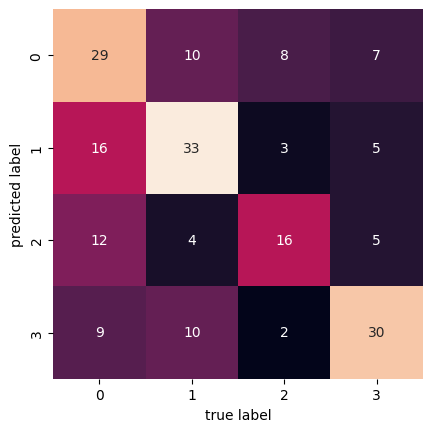

In [ ]:
# Visualize the confusion matrix of XGBOOST Classifier
mat = confusion_matrix(y_test, pred_xg)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### K-Fold Validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model_tree, x, y, cv = 10, scoring = 'f1_macro')
scores

array([0.64897575, 0.68782051, 0.54105976, 0.60467775, 0.66891815,
       0.5323214 , 0.68611857, 0.60203036, 0.31814127, 0.23830011])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.55 accuracy with a standard deviation of 0.15
